# 1.0 Importação de bibliotecas

In [1]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns

#Manipulação datas
from datetime import datetime

# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [2]:
dicionario_mes = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}

In [3]:
df = pd.DataFrame()

for i in dicionario_mes.keys():
    arquivo = dicionario_mes[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

In [4]:
df.head()

,title,media,date,desc
0,A construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,01/01/2021,Dentre os principais pontos do plano estratégi...
1,"Refinaria Abreu e Lima da Petrobras, a RNEST p...",CPG Click Petroleo e Gas,01/01/2021,Petrobras informou em fato relevante na última...
2,5 Dicas de Tony Robbins para Ficar Rico Invest...,The Capital Advisor,01/01/2021,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,Acadêmicos de engenharia Mecânica criam projet...,CPG Click Petroleo e Gas,01/01/2021,Petrobras cancela a venda da fábrica de fertil...
4,Multinacional dinamarquesa European Energy faz...,CPG Click Petroleo e Gas,01/01/2021,Petrobras encerra sociedade com a Sete Brasil ...


In [5]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [6]:
df_petro = pd.read_csv('Hist_Preço_Petr_2021_.csv', sep='|')
df_petro.head()

,Date,Adj Close,Volume,Var%
0,2021-01-04,19.274340,74719700,0.020113
1,2021-01-05,20.027718,95181100,0.039087
2,2021-01-06,20.067719,96562500,0.001997
3,2021-01-07,20.667747,56171300,0.029900
4,2021-01-08,20.747751,67136300,0.003871


In [7]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:** Há dias em que o pregão da bolsa não funciona (Finais de Semana) **VERDADEIRO**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [8]:
df.date.value_counts()

2021-08-05    10
2021-03-10    10
2021-05-21    10
2021-11-06    10
2021-03-03    10
              ..
2021-03-22     2
2021-04-04     2
2021-02-14     2
2021-08-15     2
2021-07-25     1
Name: date, Length: 327, dtype: int64

In [9]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

,index,date
0,2021-08-05,10
1,2021-03-10,10
2,2021-05-21,10
3,2021-11-06,10
4,2021-03-03,10
...,...,...
322,2021-03-22,2
323,2021-04-04,2
324,2021-02-14,2
325,2021-08-15,2


In [10]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [11]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

,index,date
0,2021-08-05,10
1,2021-03-10,10
2,2021-05-21,10
3,2021-11-06,10
4,2021-03-03,10
...,...,...
322,2021-03-22,2
323,2021-04-04,2
324,2021-02-14,2
325,2021-08-15,2


In [12]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

,index,date
243,2021-12-27,10
100,2021-12-28,10
38,2021-12-29,10
193,2021-12-30,10
58,2021-12-31,10


In [13]:
data_df.describe()

,date
count,327.000000
mean,9.253823
std,1.772258
min,1.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,10.000000


Há uma média de 9.25 (+- 2) noticias por dia

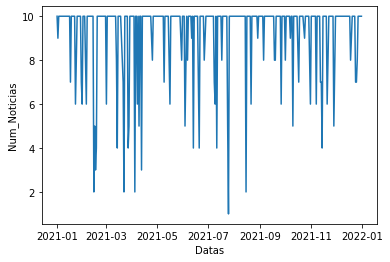

In [14]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [15]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

,Num_Noticias
Mes,
1,9.444444
2,8.888889
3,8.666667
4,9.000000
5,9.642857
6,9.185185
7,8.884615
8,9.535714
9,9.642857


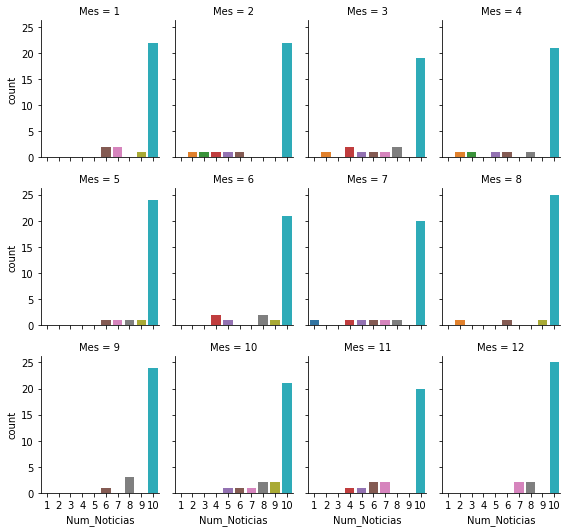

In [16]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

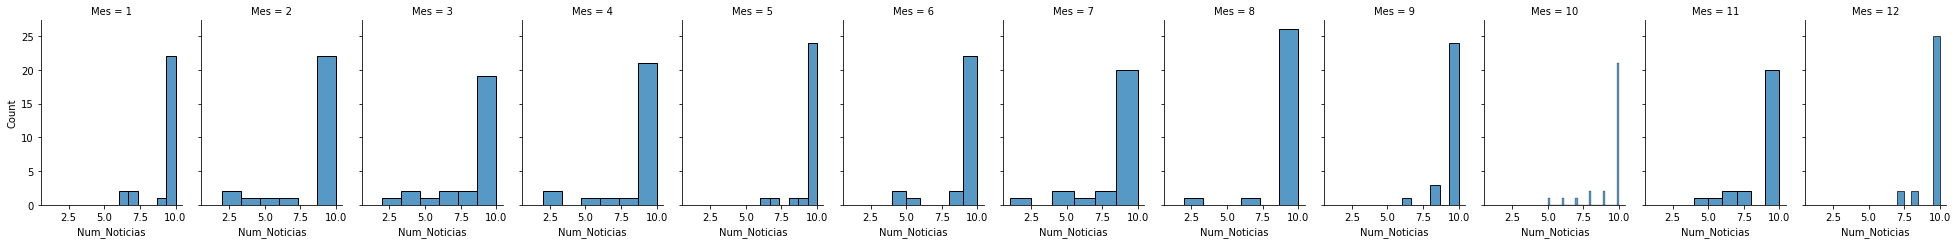

In [17]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8.6 á 9.65.

## 3.2 Há poucos dias sem noticias na base de dados

In [18]:
## Gerando uma lista com todos os dias de 2021:
start_date = '01/01/2021'
end_date = '31/12/2021'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [19]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [20]:
#Gerando lista com todas as datas sem noticias em 2021
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias em 2021!" % len(datas_sem_noticias))

Há 38 dias sem notícias em 2021!


Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [21]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [22]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [23]:
print("Há %s dias sem pregão em 2021!" % len(datas_sem_pregao))

Há 118 dias sem pregão em 2021!


# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [24]:
df.head()

,title,media,date,desc
0,A construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"Refinaria Abreu e Lima da Petrobras, a RNEST p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,5 Dicas de Tony Robbins para Ficar Rico Invest...,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,Acadêmicos de engenharia Mecânica criam projet...,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,Multinacional dinamarquesa European Energy faz...,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...


In [25]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,5 dicas de tony robbins para ficar rico invest...,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,acadêmicos de engenharia mecânica criam projet...,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,multinacional dinamarquesa european energy faz...,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...


## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [26]:
df.iloc[2][0]

'5 dicas de tony robbins para ficar rico investindo'

In [27]:
df.iloc[2][3]

'O QUE LER AGORA... ibovespa-sobe-021-apos-demissao-na-petrobras-prio3-.  Notícias. Ibovespa Sobe +0...'

Essa noticia "5 dicas de tony robbins para ficar rico investindo", por exemplo, não possui relação com a petrobras no título e nem no corpo do artigo ao checar direto na fonte em <https://comoinvestir.thecap.com.br/5-dicas-de-tony-robbins-para-ficar-rico-investindo>. A biblioteca GoogleNews() retornou essa noticia, pois, na pagina HTML há noticias recomendadas ao leitor que possuem a palavra chave "petrobras".

Noticias sem a palavra chave "petrobras" no título serão excluidas do dataset

In [28]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
2,,The Capital Advisor,2021-01-01,O QUE LER AGORA... ibovespa-sobe-021-apos-demi...
3,,CPG Click Petroleo e Gas,2021-01-01,Petrobras cancela a venda da fábrica de fertil...
4,,CPG Click Petroleo e Gas,2021-01-01,Petrobras encerra sociedade com a Sete Brasil ...
...,...,...,...,...
3021,quer trabalhar na petrobras? falta menos de um...,JC Online,2021-12-31,O processo seletivo público que oferece 757 va...
3022,,CNN Brasil,2021-12-31,"Para ele, a solução desta pressão não deve pas..."
3023,,PetroNotícias,2021-12-31,Isso porque a Petrobrás anunciou que registrou...
3024,unigel assina contratos para suprimento das fá...,CPG Click Petroleo e Gas,2021-12-31,No dia 27 de dezembro a Unigel fechou contrato...


In [29]:
df = df[(df['title'] != "")]
df

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
26,petrobras é condenada em arbitragem iniciada p...,Forbes Brasil,2021-04-01,A Petrobras disse que a sentença determinou qu...
27,petrobras fez provisionamento para indenizar iesa,Valor Econômico,2021-04-01,Petrobras fez provisionamento para indenizar I...
28,"petrobras é condenada, nos eua, a indenizar a ...",Money Times,2021-04-01,A Petrobras (PETR3; PETR4) foi condenada por u...
...,...,...,...,...
3018,aumento do preço do gás encanado: justiça inti...,FDR,2021-12-31,"Na última quinta-feira, 30, a Petrobras recebe..."
3019,presidente da petrobras diz que eleições não v...,Jovem Pan,2021-12-31,"Para 2022, Joaquim Silva e Luna entende que a ..."
3020,"petrobras conclui venda de ativos do rn, em me...",Saiba Mais,2021-12-31,Após os trabalhadores aprovarem estado de grev...
3021,quer trabalhar na petrobras? falta menos de um...,JC Online,2021-12-31,O processo seletivo público que oferece 757 va...


1494 noticias não relacionadas ao termo "Petrobras" em seus títulos foram foram excluidas do dataset

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [30]:
df_petro

,Date,Adj Close,Volume,Var%
0,2021-01-04,19.274340,74719700,0.020113
1,2021-01-05,20.027718,95181100,0.039087
2,2021-01-06,20.067719,96562500,0.001997
3,2021-01-07,20.667747,56171300,0.029900
4,2021-01-08,20.747751,67136300,0.003871
...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037
243,2021-12-27,23.582502,44227900,0.014825
244,2021-12-28,23.607111,30688100,0.001044
245,2021-12-29,23.410248,35508400,-0.008339


In [31]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

,Date,Adj Close,Volume,Var%,Fechamento
0,2021-01-04,19.274340,74719700,0.020113,1
1,2021-01-05,20.027718,95181100,0.039087,1
2,2021-01-06,20.067719,96562500,0.001997,1
3,2021-01-07,20.667747,56171300,0.029900,1
4,2021-01-08,20.747751,67136300,0.003871,1
...,...,...,...,...,...
242,2021-12-23,23.237993,28713600,0.006037,1
243,2021-12-27,23.582502,44227900,0.014825,1
244,2021-12-28,23.607111,30688100,0.001044,1
245,2021-12-29,23.410248,35508400,-0.008339,0


In [32]:
df_petro.Fechamento.value_counts()

1    131
0    116
Name: Fechamento, dtype: int64

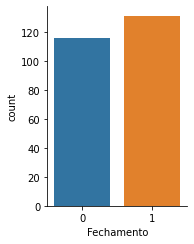

In [33]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Em 2021 houve 131 fechamentos com aumento nos valores de ações da Petrobras e 116 com fechamento em queda.

## 4.5 Concatenar noticias diárias

In [34]:
df_petro.head()

,Date,Adj Close,Volume,Var%,Fechamento
0,2021-01-04,19.274340,74719700,0.020113,1
1,2021-01-05,20.027718,95181100,0.039087,1
2,2021-01-06,20.067719,96562500,0.001997,1
3,2021-01-07,20.667747,56171300,0.029900,1
4,2021-01-08,20.747751,67136300,0.003871,1


In [35]:
df.head()

,title,media,date,desc
0,a construção naval brasileira tem chances de a...,CPG Click Petroleo e Gas,2021-01-01,Dentre os principais pontos do plano estratégi...
1,"refinaria abreu e lima da petrobras, a rnest p...",CPG Click Petroleo e Gas,2021-01-01,Petrobras informou em fato relevante na última...
26,petrobras é condenada em arbitragem iniciada p...,Forbes Brasil,2021-04-01,A Petrobras disse que a sentença determinou qu...
27,petrobras fez provisionamento para indenizar iesa,Valor Econômico,2021-04-01,Petrobras fez provisionamento para indenizar I...
28,"petrobras é condenada, nos eua, a indenizar a ...",Money Times,2021-04-01,A Petrobras (PETR3; PETR4) foi condenada por u...


In [36]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [37]:
pd.set_option('display.max_rows', None)

In [38]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
df_news_diaria

,Date,Noticias
0,2021-01-01,a construção naval brasileira tem chances de ...
41,2021-01-03,petrobras reajusta preço da gasolina pela qui...
67,2021-01-04,tcu avalia barrar venda de refinaria da petro...
87,2021-01-05,petrobras (petr4) inicia contratação de nona ...
113,2021-01-06,valor de venda de refinaria da petrobras é qu...
137,2021-01-07,petrobras confirma venda da fatia na br distr...
188,2021-01-09,silva e luna 'militariza' cúpula da petrobras...
215,2021-01-10,bolsonaro sugere usar dividendos da petrobras...
243,2021-01-11,"após comentários, petrobras nega antecipação ..."
270,2021-01-12,árabes assumem nesta quarta primeira refinari...


# 2 situações checar: 


1) Dias em que há pregão mas não há noticias, sendo que o dia anterior não tem pregão e tem noticias.  
2) Dias que há pregão e há noticias, sendo que no dia anterior não há pregão e há noticias.  

**Exemplo 1:** dia 29/11/2021 houve pregão mas não há noticias naquele dia, somente nos dias anteriores que nao houveram pregão e tiveram noticias 27/11/2021 e 28/11/2021.  
**Exemplo 2:** dia 18/01/2021 houve pregão e há noticias naquele dia, após concatenar as noticias do dia 18/01/2021 deverá incluir as noticias dos dias 16 e 17/01/2021 que não houve pregão;


In [39]:
## Itera sobre dias com pregao
for i in datas_com_pregao:
    
    ## Se o dia não tiver noticias retorna a data do dia anterior
    if i in datas_sem_noticias:
        dia_anterior = str(int(i[:2])-1) + i[2:10]
        
        # #Se o dia anterior não tiver pregão
        if dia_anterior in datas_sem_pregao:
                
            ## Se o dia anterior tiver noticias:
            if dia_anterior in datas_com_noticias:
                print(i)

29/11/2021


In [40]:
## 27/11/2021
noticia_dia_27 = df_news_diaria.iloc[267][1]
noticia_dia_27

' bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios'

In [41]:
## 28/11/2021
noticia_dia_28 = df_news_diaria.iloc[268][1]
noticia_dia_28

' por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre'

In [42]:
## 29/11/2021 -- NÂO EXISTE NOTICIA
noticia_dia_29 = ""

In [43]:
## 16/01/2021
noticia_dia_16 = df_news_diaria.iloc[11][1]
noticia_dia_16

' mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras'

In [44]:
## 17/01/2021
noticia_dia_17 = df_news_diaria.iloc[12][1]
noticia_dia_17

' petrobras quer mudar gestão de plano de saúde'

In [45]:
## 18/01/2021
noticia_dia_18 = df_news_diaria.iloc[13][1]
noticia_dia_18

' a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [46]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

,Date,Noticias
0,2021-01-11,silva e luna 'militariza' cúpula da petrobra...
1,2021-01-18,mais de 100 vagas de emprego no setor de pet...
2,2021-01-26,petrobras encerra 2020 com quadro de funcion...
3,2021-02-01,
4,2021-02-08,petrobras mira emissão no mercado internacio...
5,2021-02-17,petrobras vs preço dos combustíveis: uma pol...
6,2021-02-22,bolsonaro indica joaquim silva e luna para p...
7,2021-03-01,"'não há exagero no preço dos combustíveis', ..."
8,2021-03-08,petr3 e petr4: em qual ação da petrobras val...
9,2021-03-15,petrobras: mandatos de diretores serão esten...


Obs: Note que nos dias 04/06/2021 e 01/02/2021 houveram pregão mas não houveram noticias referente a esses dias nem os dias que os precederam.
    
    # Situação OK!

# Checagem situação de 29/11/2021

In [47]:
noticias_concatenadas = " " + noticia_dia_27 + " " + noticia_dia_28 + " " + noticia_dia_29
noticias_concatenadas

'  bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios  por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre '

In [48]:
df_news_sem_pregao.iloc[51][1] + " "


'  bolsonaro critica política de preços dos combustíveis da petrobras ibovespa: petrobras (petr4) e vale (vale3) têm maiores altas para itaú bba, pagamento de dividendos da petrobras (petr4) pode ser ainda maior usina termelétrica de camaçari: um dos principais investimentos da petrobras na bahia, foi arrendado ontem (26/11) para a petroquímica proquigel empreiteira de perfuração offshore seadrill conquista contratos de us$ 549 milhões com a petrobras, no campo de búzios  por que a privatização da petrobras não é garantia de ... petrobras e mubadala assinam transferência final da rlam nos próximos dias petrobras deve começar a vender fatia na braskem no primeiro trimestre '

Codigo OK as noticias são iguais! 

# Checagem situação de 18/01/2021

In [49]:
noticias_concatenadas = " " + noticia_dia_16 + " " + noticia_dia_17 + " " + noticia_dia_18
noticias_concatenadas

'  mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras  petrobras quer mudar gestão de plano de saúde  a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

In [50]:
df_news_sem_pregao.iloc[1][1] 

'  mais de 100 vagas de emprego no setor de petróleo e gás! ocyan inicia cadastro de currículo para contratos de manutenção da petrobras  petrobras quer mudar gestão de plano de saúde  a petrobras está represando preços de combustíveis? dados indicam que sim, mas analistas não veem motivo para pânico (ainda) petrobras anuncia aumento de mais de 8% na gasolina a partir desta terça-feira litro da gasolina sobe r$ 0,15 nas refinarias da petrobras petrobras avança na venda do maior campo de petróleo em ... ação da petrobras fecha em queda de 0,18% nesta segunda; veja valores petrobras (petr4) aprova abertura de novo plano de ... petrobras recebe em 15 dias propostas para construção de 2 plataformas no rio'

Codigo OK as noticias são iguais! 

## 4.7 Atualiza as noticias concatenadas no df_news_diaria:

In [51]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

In [52]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(299, 306)

## 4.8 Mesclando o dataframe noticias finais e ações

In [53]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2021-01-04,19.274340,74719700,0.020113,1,tcu avalia barrar venda de refinaria da petro...
1,2021-01-05,20.027718,95181100,0.039087,1,petrobras (petr4) inicia contratação de nona ...
2,2021-01-06,20.067719,96562500,0.001997,1,valor de venda de refinaria da petrobras é qu...
3,2021-01-07,20.667747,56171300,0.029900,1,petrobras confirma venda da fatia na br distr...
4,2021-01-08,20.747751,67136300,0.003871,1,NaN
5,2021-01-11,20.574409,48744700,-0.008355,0,silva e luna 'militariza' cúpula da petrobra...
6,2021-01-12,20.421068,65691900,-0.007453,0,árabes assumem nesta quarta primeira refinari...
7,2021-01-13,19.434349,93826600,-0.048319,0,petrobras é a segunda maior do mundo em opera...
8,2021-01-14,19.634359,50745400,0.010292,1,NaN
9,2021-01-15,18.747646,80673300,-0.045161,0,NaN


In [54]:
df_news_diaria_atualizada.head(12)

,Date,Noticias
0,2021-01-01,a construção naval brasileira tem chances de ...
1,2021-01-03,petrobras reajusta preço da gasolina pela qui...
2,2021-01-04,tcu avalia barrar venda de refinaria da petro...
3,2021-01-05,petrobras (petr4) inicia contratação de nona ...
4,2021-01-06,valor de venda de refinaria da petrobras é qu...
5,2021-01-07,petrobras confirma venda da fatia na br distr...
6,2021-01-09,silva e luna 'militariza' cúpula da petrobras...
7,2021-01-10,bolsonaro sugere usar dividendos da petrobras...
8,2021-01-11,silva e luna 'militariza' cúpula da petrobra...
9,2021-01-12,árabes assumem nesta quarta primeira refinari...


In [55]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2021-01-08
 8     2021-01-14
 9     2021-01-15
 13    2021-01-21
 16    2021-01-27
 22    2021-02-04
 40    2021-03-04
 41    2021-03-05
 43    2021-03-09
 51    2021-03-19
 63    2021-04-07
 68    2021-04-14
 72    2021-04-20
 83    2021-05-06
 87    2021-05-12
 117   2021-06-24
 122   2021-07-01
 134   2021-07-20
 136   2021-07-22
 140   2021-07-28
 142   2021-07-30
 146   2021-08-05
 147   2021-08-06
 152   2021-08-13
 170   2021-09-09
 171   2021-09-10
 208   2021-11-04
 220   2021-11-23
 Name: Date, dtype: datetime64[ns],
 28)

No total houveram 28 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [56]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(247, 28)

## 4.9 Exclusão dias com pregões sem noticias

In [57]:
df_final = df_final.dropna()

In [58]:
len(df_final)

219

# 5.0 NLP

Será realizado o levantamento das palavras mais frequentes em notícias para inputação de polaridade no dicionário SentilexPT caso não existam ainda.

# 5.1 SentilexPT: Inputação de polaridade de novos termos ao dicionário SentilexPT

In [59]:
sentilexpt = open('SentiLex-lem-PT01.txt','r')

Criando um dicionário com polaridades

In [60]:
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [61]:
print (dic_palavra_polaridade.get('legal'))

1


In [62]:
print (dic_palavra_polaridade.get('chato'))

-1


In [63]:
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [64]:
def sentimento(score):
    if score > 0:
        return 'Positivo'                      # se maior que 0 retorna 'positivo'
    elif score == 0:
        return 'Neutro'                     # se igual a 0 retorna 'neutro'
    else:
        return 'Negativo'                     # se menor que 0 retorna 'negativo'
        
    return score

In [65]:
testescore = Score_sentimento("DescaRadO e feIo")
testescore

-2

In [66]:
sentimento(testescore)

'Negativo'

In [67]:
df_final2 = df_final.copy()

In [68]:
df_final2['score'] = df_final2['Noticias'].apply(lambda x: Score_sentimento(x))
df_final2['Sentimento'] = df_final2['score'].apply(lambda x: sentimento(x))
df_final2

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Sentimento
0,2021-01-04,19.274340,74719700,0.020113,1,tcu avalia barrar venda de refinaria da petro...,-1,Negativo
1,2021-01-05,20.027718,95181100,0.039087,1,petrobras (petr4) inicia contratação de nona ...,0,Neutro
2,2021-01-06,20.067719,96562500,0.001997,1,valor de venda de refinaria da petrobras é qu...,-1,Negativo
3,2021-01-07,20.667747,56171300,0.029900,1,petrobras confirma venda da fatia na br distr...,0,Neutro
5,2021-01-11,20.574409,48744700,-0.008355,0,silva e luna 'militariza' cúpula da petrobra...,0,Neutro
6,2021-01-12,20.421068,65691900,-0.007453,0,árabes assumem nesta quarta primeira refinari...,0,Neutro
7,2021-01-13,19.434349,93826600,-0.048319,0,petrobras é a segunda maior do mundo em opera...,1,Positivo
10,2021-01-18,18.714314,68855700,-0.001778,0,mais de 100 vagas de emprego no setor de pet...,-1,Negativo
11,2021-01-19,19.127668,61656000,0.022088,1,proposta proíbe criação de subsidiárias da pe...,1,Positivo
12,2021-01-20,18.807648,60306200,-0.016731,0,ultrapar negocia compra de refinaria da petro...,1,Positivo


# 5.2 Tradução e aplicação textblob e vader sentiment

### Instanciando função de tradução

In [69]:
#pip install googletrans==4.0.0-rcl

In [70]:
from googletrans import Translator

In [71]:
trans = Translator()

In [72]:
trans.translate("The book is on the table", dest = 'pt').text

'O livro está sobre a mesa'

In [73]:
def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

In [74]:
frase_teste = traduzir("A comida está muito boa")
frase_teste

'the food is very good'

### Instanciando calculo de polaridade e subjetividade

In [75]:
#pip install textblob
from textblob import TextBlob

In [76]:
text_blob = TextBlob(frase_teste)
polaridade = text_blob.polarity
subjetividade = text_blob.subjectivity

polaridade, subjetividade

(0.9099999999999999, 0.7800000000000001)

In [77]:
def polaridade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    polaridade = text_blob.polarity
    return polaridade

def subjetividade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    subjetividade = text_blob.subjectivity
    return subjetividade

### Instanciando calculo de sentimento

In [78]:
#pip install vaderSentiment

In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [80]:
s_analyze = SentimentIntensityAnalyzer()
sentiment= s_analyze.polarity_scores(frase_teste)

In [81]:
sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [82]:
type(sentiment)
sentiment.get('neu')

0.556

In [83]:
def negatividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neg')
    return sentimento

def neutralidade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neu')
    return sentimento

def positividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('pos')
    return sentimento

def composicao(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('compound')
    return sentimento

In [120]:
df_final3 = df_final.copy()

In [121]:
df_final3['Noticias'] = df_final3['Noticias'].apply(lambda x: traduzir(x))
df_final3['polaridade'] = df_final3['Noticias'].apply(lambda x: polaridade(x))
df_final3['subjetividade'] = df_final3['Noticias'].apply(lambda x: subjetividade(x))
df_final3['negatividade'] = df_final3['Noticias'].apply(lambda x: negatividade(x))
df_final3['neutralidade'] = df_final3['Noticias'].apply(lambda x: neutralidade(x))
df_final3['positividade'] = df_final3['Noticias'].apply(lambda x: positividade(x))
df_final3['composicao'] = df_final3['Noticias'].apply(lambda x: composicao(x))
df_final3

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao
0,2021-01-04,19.274340,74719700,0.020113,1,tcu evaluates barring sale of petrobras refine...,0.000000,0.000000,0.170,0.830,0.000,-0.7783
1,2021-01-05,20.027718,95181100,0.039087,1,petrobras (petr4) starts contracting the ninth...,0.000000,0.000000,0.000,1.000,0.000,0.0000
2,2021-01-06,20.067719,96562500,0.001997,1,value of sale of petrobras refinery is questio...,0.250000,0.500000,0.062,0.908,0.030,-0.3818
3,2021-01-07,20.667747,56171300,0.029900,1,petrobras confirms sale of stake in br distrib...,0.350000,0.300000,0.025,0.874,0.101,0.7351
5,2021-01-11,20.574409,48744700,-0.008355,0,silva and luna 'militariza' petrobras summit p...,0.175833,0.401944,0.039,0.898,0.063,0.4477
6,2021-01-12,20.421068,65691900,-0.007453,0,Arabs take over this fourth petrobras refinery...,-0.016667,0.083333,0.000,0.948,0.052,0.5267
7,2021-01-13,19.434349,93826600,-0.048319,0,petrobras is the second largest in the world i...,-0.062500,0.375000,0.106,0.894,0.000,-0.3612
10,2021-01-18,18.714314,68855700,-0.001778,0,more than 100 jobs in the oil and gas sector! ...,0.217635,0.307239,0.058,0.837,0.105,0.7088
11,2021-01-19,19.127668,61656000,0.022088,1,proposal prohibits creation of petrobras subsi...,0.070000,0.446667,0.058,0.879,0.063,-0.1531
12,2021-01-20,18.807648,60306200,-0.016731,0,ultrapar negotiates purchase of petrobras refi...,0.083333,0.466667,0.058,0.906,0.036,-0.1027


# 5.3 Tradução e aplicação do modelo pré-treinado de Roberta
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [86]:
#pip install –upgrade pip

In [87]:
#pip install tensorflow

In [88]:
#pip install transformers

In [89]:
#pip install torch

In [90]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [91]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [110]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [125]:
def neg_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    neu_roberta = scores[1]
    #pos_roberta = scores[2]
    return neu_roberta

def pos_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    #neu_roberta = scores[1]
    pos_roberta = scores[2]
    return pos_roberta
    

In [126]:
df_final4 = df_final.copy()

In [127]:
df_final4['Noticias'] = df_final4['Noticias'].apply(lambda x: traduzir(x))
df_final4['neg_rob'] = df_final4['Noticias'].apply(lambda x: neg_rob(x))
df_final4['neu_rob'] = df_final4['Noticias'].apply(lambda x: neu_rob(x))
df_final4['pos_rob'] = df_final4['Noticias'].apply(lambda x: pos_rob(x))
df_final4

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,neg_rob,neu_rob,pos_rob
0,2021-01-04,19.274340,74719700,0.020113,1,tcu evaluates barring sale of petrobras refine...,0.622488,0.368297,0.009215
1,2021-01-05,20.027718,95181100,0.039087,1,petrobras (petr4) starts contracting the ninth...,0.174271,0.802117,0.023612
2,2021-01-06,20.067719,96562500,0.001997,1,value of sale of petrobras refinery is questio...,0.555512,0.420393,0.024095
3,2021-01-07,20.667747,56171300,0.029900,1,petrobras confirms sale of stake in br distrib...,0.057473,0.857900,0.084627
5,2021-01-11,20.574409,48744700,-0.008355,0,silva and luna 'militariza' petrobras summit p...,0.168009,0.792461,0.039529
6,2021-01-12,20.421068,65691900,-0.007453,0,Arabs take over this fourth petrobras refinery...,0.099127,0.823672,0.077201
7,2021-01-13,19.434349,93826600,-0.048319,0,petrobras is the second largest in the world i...,0.210568,0.622706,0.166726
10,2021-01-18,18.714314,68855700,-0.001778,0,more than 100 jobs in the oil and gas sector! ...,0.079121,0.634652,0.286227
11,2021-01-19,19.127668,61656000,0.022088,1,proposal prohibits creation of petrobras subsi...,0.668615,0.303681,0.027704
12,2021-01-20,18.807648,60306200,-0.016731,0,ultrapar negotiates purchase of petrobras refi...,0.354750,0.614337,0.030913


# 6.0 Testes com Classificação

## 6.1 SentilexPT

In [128]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


C:\Users\HP ZBook 15\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [129]:
X = df_final2.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias','Sentimento'])
y = df_final2['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [130]:
X_train

,score
206,0
243,3
229,0
1,0
137,0
207,1
12,1
73,1
180,0
96,0


In [131]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.09it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.65               0.65     0.65      0.65   
QuadraticDiscriminantAnalysis      0.61               0.59     0.59      0.58   
GaussianNB                         0.61               0.59     0.59      0.58   
LinearSVC                          0.59               0.58     0.58      0.56   
LinearDiscriminantAnalysis         0.59               0.58     0.58      0.56   
SGDClassifier                      0.59               0.58     0.58      0.56   
RidgeClassifierCV                  0.59               0.58     0.58      0.56   
RidgeClassifier                    0.59               0.58     0.58      0.56   
Perceptron                         0.59               0.58     0.58      0.56   
PassiveAggressiveClassifier        0.59               0.58     0.58      0.56   
NearestCentroid             

A acurácia dos top 5 algorítmos variou de 65% á 59%
- DummyClassifier
- QuadraticDiscriminantAnalysis      
- GaussianNB  
- LinearSVC    
- LinearDiscriminantAnalysis

## 6.2 Tradução + Vader Sentiment

In [132]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [133]:
X = df_final3.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
y = df_final3['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [134]:
X_train

,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao
206,0.21,0.28,0.15,0.75,0.10,-0.38
243,0.29,0.44,0.05,0.86,0.09,0.81
229,0.25,0.25,0.02,0.91,0.07,0.48
1,0.00,0.00,0.00,1.00,0.00,0.00
137,0.50,0.50,0.05,0.88,0.07,0.20
207,0.30,0.47,0.11,0.89,0.00,-0.81
12,0.08,0.47,0.06,0.91,0.04,-0.10
73,0.03,0.27,0.07,0.92,0.02,-0.35
180,0.00,0.00,0.00,0.57,0.43,0.65
96,0.11,0.45,0.15,0.77,0.07,-0.46


In [135]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.00it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.65               0.65     0.65      0.65   
XGBClassifier                      0.64               0.64     0.64      0.63   
LinearSVC                          0.64               0.63     0.63      0.64   
LogisticRegression                 0.64               0.63     0.63      0.64   
RidgeClassifier                    0.64               0.63     0.63      0.64   
LinearDiscriminantAnalysis         0.64               0.63     0.63      0.64   
ExtraTreeClassifier                0.62               0.62     0.62      0.62   
RidgeClassifierCV                  0.62               0.62     0.62      0.62   
ExtraTreesClassifier               0.61               0.61     0.61      0.61   
SVC                                0.61               0.60     0.60      0.61   
BernoulliNB                 

A acurácia dos top 5 algorítmos variou de 65% á 64%
- DummyClassifier
- XGBClassifier                           
- LinearSVC                             
- LogisticRegression                     
- RidgeClassifier                    

## 6.3 Modelo pré-treinado de Roberta

In [136]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [137]:
X = df_final4.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'])
y = df_final4['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [138]:
X_train

,neg_rob,neu_rob,pos_rob
206,0.43,0.53,0.04
243,0.38,0.56,0.06
229,0.04,0.81,0.15
1,0.17,0.80,0.02
137,0.51,0.46,0.03
207,0.44,0.52,0.03
12,0.35,0.61,0.03
73,0.51,0.46,0.03
180,0.02,0.90,0.07
96,0.64,0.33,0.03


In [139]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.13it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.65               0.65     0.65      0.65   
Perceptron                         0.58               0.58     0.58      0.58   
SGDClassifier                      0.56               0.57     0.57      0.54   
BernoulliNB                        0.53               0.53     0.53      0.53   
NearestCentroid                    0.52               0.52     0.52      0.52   
KNeighborsClassifier               0.52               0.51     0.51      0.52   
RidgeClassifier                    0.52               0.51     0.51      0.51   
LinearSVC                          0.52               0.51     0.51      0.51   
QuadraticDiscriminantAnalysis      0.50               0.51     0.51      0.49   
RidgeClassifierCV                  0.50               0.50     0.50      0.50   
LinearDiscriminantAnalysis  

A acurácia dos top 5 algorítmos variou de 65% á 52%
- DummyClassifier                    
- Perceptron                                                    
- SGDClassifier                                                   
- BernoulliNB                                             
- NearestCentroid                        

## 6.4 Composição SentilextPT + Tradução & Vader Sentiment

In [157]:
df_final5 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final5

,Date,Adj Close,Volume,Var%,Fechamento,Noticias_x,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao,Noticias_y,score,Sentimento
0,2021-01-04,19.27,74719700,0.02,1,tcu evaluates barring sale of petrobras refine...,0.00,0.00,0.17,0.83,0.00,-0.78,tcu avalia barrar venda de refinaria da petro...,-1,Negativo
1,2021-01-05,20.03,95181100,0.04,1,petrobras (petr4) starts contracting the ninth...,0.00,0.00,0.00,1.00,0.00,0.00,petrobras (petr4) inicia contratação de nona ...,0,Neutro
2,2021-01-06,20.07,96562500,0.00,1,value of sale of petrobras refinery is questio...,0.25,0.50,0.06,0.91,0.03,-0.38,valor de venda de refinaria da petrobras é qu...,-1,Negativo
3,2021-01-07,20.67,56171300,0.03,1,petrobras confirms sale of stake in br distrib...,0.35,0.30,0.03,0.87,0.10,0.74,petrobras confirma venda da fatia na br distr...,0,Neutro
4,2021-01-11,20.57,48744700,-0.01,0,silva and luna 'militariza' petrobras summit p...,0.18,0.40,0.04,0.90,0.06,0.45,silva e luna 'militariza' cúpula da petrobra...,0,Neutro
5,2021-01-12,20.42,65691900,-0.01,0,Arabs take over this fourth petrobras refinery...,-0.02,0.08,0.00,0.95,0.05,0.53,árabes assumem nesta quarta primeira refinari...,0,Neutro
6,2021-01-13,19.43,93826600,-0.05,0,petrobras is the second largest in the world i...,-0.06,0.38,0.11,0.89,0.00,-0.36,petrobras é a segunda maior do mundo em opera...,1,Positivo
7,2021-01-18,18.71,68855700,-0.00,0,more than 100 jobs in the oil and gas sector! ...,0.22,0.31,0.06,0.84,0.10,0.71,mais de 100 vagas de emprego no setor de pet...,-1,Negativo
8,2021-01-19,19.13,61656000,0.02,1,proposal prohibits creation of petrobras subsi...,0.07,0.45,0.06,0.88,0.06,-0.15,proposta proíbe criação de subsidiárias da pe...,1,Positivo
9,2021-01-20,18.81,60306200,-0.02,0,ultrapar negotiates purchase of petrobras refi...,0.08,0.47,0.06,0.91,0.04,-0.10,ultrapar negocia compra de refinaria da petro...,1,Positivo


In [159]:
X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final5['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [160]:
X_train

,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao,score
180,0.21,0.28,0.15,0.75,0.10,-0.38,0
215,0.29,0.44,0.05,0.86,0.09,0.81,3
201,0.25,0.25,0.02,0.91,0.07,0.48,0
1,0.00,0.00,0.00,1.00,0.00,0.00,0
118,0.50,0.50,0.05,0.88,0.07,0.20,0
181,0.30,0.47,0.11,0.89,0.00,-0.81,1
9,0.08,0.47,0.06,0.91,0.04,-0.10,1
60,0.03,0.27,0.07,0.92,0.02,-0.35,1
154,0.00,0.00,0.00,0.57,0.43,0.65,0
81,0.11,0.45,0.15,0.77,0.07,-0.46,0


In [161]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.51it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.68               0.68     0.68      0.68   
RidgeClassifierCV                  0.68               0.68     0.68      0.68   
RidgeClassifier                    0.68               0.68     0.68      0.68   
LinearDiscriminantAnalysis         0.68               0.68     0.68      0.68   
LogisticRegression                 0.68               0.68     0.68      0.68   
ExtraTreesClassifier               0.67               0.67     0.67      0.67   
CalibratedClassifierCV             0.67               0.66     0.66      0.66   
DummyClassifier                    0.65               0.65     0.65      0.65   
NuSVC                              0.64               0.63     0.63      0.64   
BaggingClassifier                  0.62               0.62     0.62      0.62   
BernoulliNB                 

A acurácia dos top 5 algorítmos ficou em 68%
- LinearSVC                          
- RidgeClassifierCV                       
- RidgeClassifier                    
- LinearDiscriminantAnalysis    
- LogisticRegression                        

## 6.5 Composição SentilextPT + Tradução & Roberta

In [166]:
df_final6 = df_final4.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final6

,Date,Adj Close,Volume,Var%,Fechamento,Noticias_x,neg_rob,neu_rob,pos_rob,Noticias_y,score,Sentimento
0,2021-01-04,19.27,74719700,0.02,1,tcu evaluates barring sale of petrobras refine...,0.62,0.37,0.01,tcu avalia barrar venda de refinaria da petro...,-1,Negativo
1,2021-01-05,20.03,95181100,0.04,1,petrobras (petr4) starts contracting the ninth...,0.17,0.80,0.02,petrobras (petr4) inicia contratação de nona ...,0,Neutro
2,2021-01-06,20.07,96562500,0.00,1,value of sale of petrobras refinery is questio...,0.56,0.42,0.02,valor de venda de refinaria da petrobras é qu...,-1,Negativo
3,2021-01-07,20.67,56171300,0.03,1,petrobras confirms sale of stake in br distrib...,0.06,0.86,0.08,petrobras confirma venda da fatia na br distr...,0,Neutro
4,2021-01-11,20.57,48744700,-0.01,0,silva and luna 'militariza' petrobras summit p...,0.17,0.79,0.04,silva e luna 'militariza' cúpula da petrobra...,0,Neutro
5,2021-01-12,20.42,65691900,-0.01,0,Arabs take over this fourth petrobras refinery...,0.10,0.82,0.08,árabes assumem nesta quarta primeira refinari...,0,Neutro
6,2021-01-13,19.43,93826600,-0.05,0,petrobras is the second largest in the world i...,0.21,0.62,0.17,petrobras é a segunda maior do mundo em opera...,1,Positivo
7,2021-01-18,18.71,68855700,-0.00,0,more than 100 jobs in the oil and gas sector! ...,0.08,0.63,0.29,mais de 100 vagas de emprego no setor de pet...,-1,Negativo
8,2021-01-19,19.13,61656000,0.02,1,proposal prohibits creation of petrobras subsi...,0.67,0.30,0.03,proposta proíbe criação de subsidiárias da pe...,1,Positivo
9,2021-01-20,18.81,60306200,-0.02,0,ultrapar negotiates purchase of petrobras refi...,0.35,0.61,0.03,ultrapar negocia compra de refinaria da petro...,1,Positivo


In [167]:
X = df_final6.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final6['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [168]:
X_train

,neg_rob,neu_rob,pos_rob,score
180,0.43,0.53,0.04,0
215,0.38,0.56,0.06,3
201,0.04,0.81,0.15,0
1,0.17,0.80,0.02,0
118,0.51,0.46,0.03,0
181,0.44,0.52,0.03,1
9,0.35,0.61,0.03,1
60,0.51,0.46,0.03,1
154,0.02,0.90,0.07,0
81,0.64,0.33,0.03,0


In [169]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.40it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.65               0.65     0.65      0.65   
Perceptron                         0.59               0.59     0.59      0.59   
LinearSVC                          0.59               0.59     0.59      0.59   
LogisticRegression                 0.59               0.59     0.59      0.59   
RidgeClassifier                    0.58               0.57     0.57      0.57   
RidgeClassifierCV                  0.58               0.57     0.57      0.57   
LinearDiscriminantAnalysis         0.58               0.57     0.57      0.57   
BernoulliNB                        0.56               0.56     0.56      0.56   
CalibratedClassifierCV             0.56               0.55     0.55      0.56   
NearestCentroid                    0.53               0.53     0.53      0.53   
GaussianNB                  

A acurácia dos top 5 algorítmos variou de 65% á 58%

DummyClassifier                    
Perceptron                         
LinearSVC                          
LogisticRegression                 
RidgeClassifier                    

## 6.6 Composição Tradução & Vader Sentiment + Tradução & Roberta


In [170]:
df_final7 = df_final4.merge(df_final3, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final7

,Date,Adj Close,Volume,Var%,Fechamento,Noticias_x,neg_rob,neu_rob,pos_rob,Noticias_y,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao
0,2021-01-04,19.27,74719700,0.02,1,tcu evaluates barring sale of petrobras refine...,0.62,0.37,0.01,tcu evaluates barring sale of petrobras refine...,0.00,0.00,0.17,0.83,0.00,-0.78
1,2021-01-05,20.03,95181100,0.04,1,petrobras (petr4) starts contracting the ninth...,0.17,0.80,0.02,petrobras (petr4) starts contracting the ninth...,0.00,0.00,0.00,1.00,0.00,0.00
2,2021-01-06,20.07,96562500,0.00,1,value of sale of petrobras refinery is questio...,0.56,0.42,0.02,value of sale of petrobras refinery is questio...,0.25,0.50,0.06,0.91,0.03,-0.38
3,2021-01-07,20.67,56171300,0.03,1,petrobras confirms sale of stake in br distrib...,0.06,0.86,0.08,petrobras confirms sale of stake in br distrib...,0.35,0.30,0.03,0.87,0.10,0.74
4,2021-01-11,20.57,48744700,-0.01,0,silva and luna 'militariza' petrobras summit p...,0.17,0.79,0.04,silva and luna 'militariza' petrobras summit p...,0.18,0.40,0.04,0.90,0.06,0.45
5,2021-01-12,20.42,65691900,-0.01,0,Arabs take over this fourth petrobras refinery...,0.10,0.82,0.08,Arabs take over this fourth petrobras refinery...,-0.02,0.08,0.00,0.95,0.05,0.53
6,2021-01-13,19.43,93826600,-0.05,0,petrobras is the second largest in the world i...,0.21,0.62,0.17,petrobras is the second largest in the world i...,-0.06,0.38,0.11,0.89,0.00,-0.36
7,2021-01-18,18.71,68855700,-0.00,0,more than 100 jobs in the oil and gas sector! ...,0.08,0.63,0.29,more than 100 jobs in the oil and gas sector! ...,0.22,0.31,0.06,0.84,0.10,0.71
8,2021-01-19,19.13,61656000,0.02,1,proposal prohibits creation of petrobras subsi...,0.67,0.30,0.03,proposal prohibits creation of petrobras subsi...,0.07,0.45,0.06,0.88,0.06,-0.15
9,2021-01-20,18.81,60306200,-0.02,0,ultrapar negotiates purchase of petrobras refi...,0.35,0.61,0.03,ultrapar negotiates purchase of petrobras refi...,0.08,0.47,0.06,0.91,0.04,-0.10


In [173]:
X = df_final7.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y'])
y = df_final7['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [174]:
X_train

,neg_rob,neu_rob,pos_rob,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao
180,0.43,0.53,0.04,0.21,0.28,0.15,0.75,0.10,-0.38
215,0.38,0.56,0.06,0.29,0.44,0.05,0.86,0.09,0.81
201,0.04,0.81,0.15,0.25,0.25,0.02,0.91,0.07,0.48
1,0.17,0.80,0.02,0.00,0.00,0.00,1.00,0.00,0.00
118,0.51,0.46,0.03,0.50,0.50,0.05,0.88,0.07,0.20
181,0.44,0.52,0.03,0.30,0.47,0.11,0.89,0.00,-0.81
9,0.35,0.61,0.03,0.08,0.47,0.06,0.91,0.04,-0.10
60,0.51,0.46,0.03,0.03,0.27,0.07,0.92,0.02,-0.35
154,0.02,0.90,0.07,0.00,0.00,0.00,0.57,0.43,0.65
81,0.64,0.33,0.03,0.11,0.45,0.15,0.77,0.07,-0.46


In [175]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.90it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.65               0.65     0.65      0.65   
LinearSVC                          0.62               0.62     0.62      0.62   
LinearDiscriminantAnalysis         0.62               0.62     0.62      0.62   
RidgeClassifier                    0.62               0.62     0.62      0.62   
LogisticRegression                 0.62               0.62     0.62      0.62   
SVC                                0.61               0.61     0.61      0.61   
CalibratedClassifierCV             0.61               0.60     0.60      0.60   
BernoulliNB                        0.59               0.59     0.59      0.59   
RidgeClassifierCV                  0.59               0.59     0.59      0.59   
XGBClassifier                      0.58               0.58     0.58      0.57   
NearestCentroid             

A acurácia dos top 5 algorítmos variou de 65% á 61%

DummyClassifier                    
LinearSVC                                                   
LinearDiscriminantAnalysis  
RidgeClassifier    
LogisticRegression                  

## 6.7 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta


In [196]:
# Sentilex + Vader
df_final8 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final8

,Date,Adj Close,Volume,Var%,Fechamento,Noticias_x,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao,Noticias_y,score,Sentimento
0,2021-01-04,19.27,74719700,0.02,1,tcu evaluates barring sale of petrobras refine...,0.00,0.00,0.17,0.83,0.00,-0.78,tcu avalia barrar venda de refinaria da petro...,-1,Negativo
1,2021-01-05,20.03,95181100,0.04,1,petrobras (petr4) starts contracting the ninth...,0.00,0.00,0.00,1.00,0.00,0.00,petrobras (petr4) inicia contratação de nona ...,0,Neutro
2,2021-01-06,20.07,96562500,0.00,1,value of sale of petrobras refinery is questio...,0.25,0.50,0.06,0.91,0.03,-0.38,valor de venda de refinaria da petrobras é qu...,-1,Negativo
3,2021-01-07,20.67,56171300,0.03,1,petrobras confirms sale of stake in br distrib...,0.35,0.30,0.03,0.87,0.10,0.74,petrobras confirma venda da fatia na br distr...,0,Neutro
4,2021-01-11,20.57,48744700,-0.01,0,silva and luna 'militariza' petrobras summit p...,0.18,0.40,0.04,0.90,0.06,0.45,silva e luna 'militariza' cúpula da petrobra...,0,Neutro
5,2021-01-12,20.42,65691900,-0.01,0,Arabs take over this fourth petrobras refinery...,-0.02,0.08,0.00,0.95,0.05,0.53,árabes assumem nesta quarta primeira refinari...,0,Neutro
6,2021-01-13,19.43,93826600,-0.05,0,petrobras is the second largest in the world i...,-0.06,0.38,0.11,0.89,0.00,-0.36,petrobras é a segunda maior do mundo em opera...,1,Positivo
7,2021-01-18,18.71,68855700,-0.00,0,more than 100 jobs in the oil and gas sector! ...,0.22,0.31,0.06,0.84,0.10,0.71,mais de 100 vagas de emprego no setor de pet...,-1,Negativo
8,2021-01-19,19.13,61656000,0.02,1,proposal prohibits creation of petrobras subsi...,0.07,0.45,0.06,0.88,0.06,-0.15,proposta proíbe criação de subsidiárias da pe...,1,Positivo
9,2021-01-20,18.81,60306200,-0.02,0,ultrapar negotiates purchase of petrobras refi...,0.08,0.47,0.06,0.91,0.04,-0.10,ultrapar negocia compra de refinaria da petro...,1,Positivo


In [198]:
# + Roberta
df_final8 = df_final8.merge(df_final4, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
df_final8

,Date,Adj Close,Volume,Var%,Fechamento,Noticias_x,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao,Noticias_y,score,Sentimento,Noticias,neg_rob,neu_rob,pos_rob
0,2021-01-04,19.27,74719700,0.02,1,tcu evaluates barring sale of petrobras refine...,0.00,0.00,0.17,0.83,0.00,-0.78,tcu avalia barrar venda de refinaria da petro...,-1,Negativo,tcu evaluates barring sale of petrobras refine...,0.62,0.37,0.01
1,2021-01-05,20.03,95181100,0.04,1,petrobras (petr4) starts contracting the ninth...,0.00,0.00,0.00,1.00,0.00,0.00,petrobras (petr4) inicia contratação de nona ...,0,Neutro,petrobras (petr4) starts contracting the ninth...,0.17,0.80,0.02
2,2021-01-06,20.07,96562500,0.00,1,value of sale of petrobras refinery is questio...,0.25,0.50,0.06,0.91,0.03,-0.38,valor de venda de refinaria da petrobras é qu...,-1,Negativo,value of sale of petrobras refinery is questio...,0.56,0.42,0.02
3,2021-01-07,20.67,56171300,0.03,1,petrobras confirms sale of stake in br distrib...,0.35,0.30,0.03,0.87,0.10,0.74,petrobras confirma venda da fatia na br distr...,0,Neutro,petrobras confirms sale of stake in br distrib...,0.06,0.86,0.08
4,2021-01-11,20.57,48744700,-0.01,0,silva and luna 'militariza' petrobras summit p...,0.18,0.40,0.04,0.90,0.06,0.45,silva e luna 'militariza' cúpula da petrobra...,0,Neutro,silva and luna 'militariza' petrobras summit p...,0.17,0.79,0.04
5,2021-01-12,20.42,65691900,-0.01,0,Arabs take over this fourth petrobras refinery...,-0.02,0.08,0.00,0.95,0.05,0.53,árabes assumem nesta quarta primeira refinari...,0,Neutro,Arabs take over this fourth petrobras refinery...,0.10,0.82,0.08
6,2021-01-13,19.43,93826600,-0.05,0,petrobras is the second largest in the world i...,-0.06,0.38,0.11,0.89,0.00,-0.36,petrobras é a segunda maior do mundo em opera...,1,Positivo,petrobras is the second largest in the world i...,0.21,0.62,0.17
7,2021-01-18,18.71,68855700,-0.00,0,more than 100 jobs in the oil and gas sector! ...,0.22,0.31,0.06,0.84,0.10,0.71,mais de 100 vagas de emprego no setor de pet...,-1,Negativo,more than 100 jobs in the oil and gas sector! ...,0.08,0.63,0.29
8,2021-01-19,19.13,61656000,0.02,1,proposal prohibits creation of petrobras subsi...,0.07,0.45,0.06,0.88,0.06,-0.15,proposta proíbe criação de subsidiárias da pe...,1,Positivo,proposal prohibits creation of petrobras subsi...,0.67,0.30,0.03
9,2021-01-20,18.81,60306200,-0.02,0,ultrapar negotiates purchase of petrobras refi...,0.08,0.47,0.06,0.91,0.04,-0.10,ultrapar negocia compra de refinaria da petro...,1,Positivo,ultrapar negotiates purchase of petrobras refi...,0.35,0.61,0.03


In [199]:
X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
y = df_final8['Fechamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [200]:
X_train

,polaridade,subjetividade,negatividade,neutralidade,positividade,composicao,score,neg_rob,neu_rob,pos_rob
180,0.21,0.28,0.15,0.75,0.10,-0.38,0,0.43,0.53,0.04
215,0.29,0.44,0.05,0.86,0.09,0.81,3,0.38,0.56,0.06
201,0.25,0.25,0.02,0.91,0.07,0.48,0,0.04,0.81,0.15
1,0.00,0.00,0.00,1.00,0.00,0.00,0,0.17,0.80,0.02
118,0.50,0.50,0.05,0.88,0.07,0.20,0,0.51,0.46,0.03
181,0.30,0.47,0.11,0.89,0.00,-0.81,1,0.44,0.52,0.03
9,0.08,0.47,0.06,0.91,0.04,-0.10,1,0.35,0.61,0.03
60,0.03,0.27,0.07,0.92,0.02,-0.35,1,0.51,0.46,0.03
154,0.00,0.00,0.00,0.57,0.43,0.65,0,0.02,0.90,0.07
81,0.11,0.45,0.15,0.77,0.07,-0.46,0,0.64,0.33,0.03


In [201]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.22it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
CalibratedClassifierCV             0.67               0.66     0.66      0.66   
LogisticRegression                 0.65               0.65     0.65      0.65   
RidgeClassifierCV                  0.65               0.65     0.65      0.65   
DummyClassifier                    0.65               0.65     0.65      0.65   
LinearSVC                          0.64               0.63     0.63      0.64   
RidgeClassifier                    0.64               0.63     0.63      0.64   
LinearDiscriminantAnalysis         0.64               0.63     0.63      0.64   
BernoulliNB                        0.62               0.62     0.62      0.62   
XGBClassifier                      0.61               0.61     0.61      0.60   
SGDClassifier                      0.59               0.60     0.60      0.58   
SVC                         

A acurácia dos top 5 algorítmos variou de 67% á 64%

CalibratedClassifierCV                                 
LogisticRegression                                                                    
RidgeClassifierCV                    
DummyClassifier                        
LinearSVC                             

## 6.8 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta com Diminuição de dimensionalidade e Normalização

In [204]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [209]:
df_models = pd.DataFrame()

X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
y = df_final8['Fechamento']
    
## Laço para experimentações com diversos numeros de PCA (de 2 á 9)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    # normalizando os dados de treino e teste
    scaler_train = StandardScaler()
    scaler_test = StandardScaler()

    scaler_train.fit(x_train)
    scaler_test.fit(x_test)

    x_train_normalized = scaler_train.transform(x_train)
    x_test_normalized = scaler_test.transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

Testando com PCA = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.05it/s]


Testando com PCA = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.77it/s]


Testando com PCA = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.96it/s]


Testando com PCA = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.53it/s]


Testando com PCA = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.97it/s]


Testando com PCA = 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.02it/s]


Testando com PCA = 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.14it/s]


Testando com PCA = 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.75it/s]


In [217]:
df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,n_PCA
0,SGDClassifier,0.59,0.59,0.59,0.59,0.03,2
15,SGDClassifier,0.59,0.59,0.59,0.59,0.01,5
36,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.04,9
35,SGDClassifier,0.59,0.59,0.59,0.59,0.01,9
31,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.06,8
30,SGDClassifier,0.59,0.59,0.59,0.59,0.01,8
26,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.04,7
25,SGDClassifier,0.59,0.59,0.59,0.59,0.01,7
21,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.04,6
1,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.08,2


A acurácia dos top 5 algorítmos ficou em 59%

SGDClassifier com 2 features reduzidas  
SGDClassifier com 5 features reduzidas
CalibratedClassifierCV com 9 features reduzidas  
SGDClassifier com 9 features reduzidas  
CalibratedClassifierCV com 8 features reduzidas

## 6.9 Composição SentilexPT + Tradução & Vader Sentiment + Tradução & Roberta com Diminuição de dimensionalidade e SEM Normalização

In [215]:
df_models = pd.DataFrame()

X = df_final8.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y', 'Noticias', 'Sentimento'])
y = df_final8['Fechamento']
    
## Laço para experimentações com diversos numeros de PCA (de 2 á 9)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (top 5 Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

Testando com PCA = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.23it/s]


Testando com PCA = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.72it/s]


Testando com PCA = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.51it/s]


Testando com PCA = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.07it/s]


Testando com PCA = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Testando com PCA = 7!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.21it/s]


Testando com PCA = 8!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.78it/s]


Testando com PCA = 9!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.08it/s]


In [218]:
df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,n_PCA
0,SGDClassifier,0.59,0.59,0.59,0.59,0.03,2
15,SGDClassifier,0.59,0.59,0.59,0.59,0.01,5
36,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.04,9
35,SGDClassifier,0.59,0.59,0.59,0.59,0.01,9
31,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.06,8
30,SGDClassifier,0.59,0.59,0.59,0.59,0.01,8
26,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.04,7
25,SGDClassifier,0.59,0.59,0.59,0.59,0.01,7
21,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.04,6
1,CalibratedClassifierCV,0.59,0.57,0.57,0.57,0.08,2


A acurácia dos top 5 algorítmos ficou em 59%

SGDClassifier com 2 features reduzidas  
SGDClassifier com 5 features reduzidas
CalibratedClassifierCV com 9 features reduzidas  
SGDClassifier com 9 features reduzidas  
CalibratedClassifierCV com 8 features reduzidas

## 6.10 Composição SentilextPT + Tradução & Vader Sentiment com Diminuição de dimensionalidade e Normalização

In [219]:
df_models = pd.DataFrame()

X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final5['Fechamento']
 
## Laço para experimentações com diversos numeros de PCA (de 2 á 6)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    # normalizando os dados de treino e teste
    scaler_train = StandardScaler()
    scaler_test = StandardScaler()

    scaler_train.fit(x_train)
    scaler_test.fit(x_test)

    x_train_normalized = scaler_train.transform(x_train)
    x_test_normalized = scaler_test.transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

Testando com PCA = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.29it/s]


Testando com PCA = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.32it/s]


Testando com PCA = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.14it/s]


Testando com PCA = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.06it/s]


Testando com PCA = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.88it/s]


In [220]:
df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,n_PCA
10,Perceptron,0.64,0.63,0.63,0.64,0.02,4
0,LabelPropagation,0.62,0.61,0.61,0.62,0.02,2
1,LabelSpreading,0.62,0.61,0.61,0.62,0.01,2
15,BaggingClassifier,0.62,0.63,0.63,0.62,0.05,5
11,AdaBoostClassifier,0.62,0.62,0.62,0.62,0.11,4
2,ExtraTreeClassifier,0.61,0.61,0.61,0.60,0.01,2
21,ExtraTreesClassifier,0.61,0.60,0.60,0.60,0.13,6
20,XGBClassifier,0.61,0.61,0.61,0.61,0.04,6
16,RandomForestClassifier,0.61,0.60,0.60,0.60,0.21,5
18,ExtraTreesClassifier,0.59,0.58,0.58,0.59,0.10,5


A acurácia dos top 5 algorítmos variou de 64% a 62%

Perceptron com 4 features reduzidas  
LabelPropagation com 2 features reduzidas  
LabelSpreading com 2 features reduzidas  
BaggingClassifier com 5 features reduzidas  
AdaBoostClassifier com 4 features reduzidas

## 6.11 Composição SentilextPT + Tradução & Vader Sentiment com Diminuição de dimensionalidade e SEM Normalização

In [221]:
df_models = pd.DataFrame()

X = df_final5.drop(columns=['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias_x','Noticias_y','Sentimento'])
y = df_final5['Fechamento']
    
## Laço para experimentações com diversos numeros de PCA (de 2 á 6)
for i in range(2,len(X.columns),1):
    print("Testando com PCA = %s!" % i)
    #Holdout
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ### 
    
    #Aplicando PCA
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)

    #Testando os modelos
    reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train, y_test)
    models['n_PCA'] = i

    # Armazenando os 5 melhores modelos (top 5 Maiores Acurácia)
    df_models = df_models.append(models.reset_index().sort_values(by='Accuracy', ascending=False).head(5), ignore_index=True)

Testando com PCA = 2!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.16it/s]


Testando com PCA = 3!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.88it/s]


Testando com PCA = 4!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.54it/s]


Testando com PCA = 5!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.43it/s]


Testando com PCA = 6!


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.27it/s]


In [222]:
df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,n_PCA
0,XGBClassifier,0.61,0.61,0.61,0.61,0.06,2
15,XGBClassifier,0.61,0.61,0.61,0.61,0.06,5
21,ExtraTreesClassifier,0.61,0.60,0.60,0.60,0.15,6
5,XGBClassifier,0.61,0.61,0.61,0.61,0.06,3
6,ExtraTreesClassifier,0.61,0.60,0.60,0.60,0.13,3
20,XGBClassifier,0.61,0.61,0.61,0.61,0.05,6
10,XGBClassifier,0.61,0.61,0.61,0.61,0.04,4
11,ExtraTreesClassifier,0.61,0.60,0.60,0.60,0.13,4
1,ExtraTreesClassifier,0.61,0.60,0.60,0.60,0.14,2
16,ExtraTreesClassifier,0.61,0.60,0.60,0.60,0.13,5


A acurácia dos top 5 algorítmos ficou e 61%

XGBClassifier com 2 features reduzidas  
XGBClassifier com 5 features reduzidas  
ExtraTreesClassifier com 6 features reduzidas  
XGBClassifier com 3 features reduzidas  
ExtraTreesClassifier com 3 features reduzidas